In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix,roc_curve,mean_squared_error,classification_report
from sklearn.model_selection import train_test_split ,LeaveOneOut, cross_val_score,GridSearchCV,StratifiedKFold,learning_curve


In [9]:
df = pd.read_csv('reduced_data.csv')
x= df.drop(['target'],axis=1)
y= df['target']

In [11]:
# Split the resampled and PCA-transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Create a Logisitc Regression Classifier object
LR_classifier = LogisticRegression(random_state=42)

# Train the classifier using the training data
LR_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LR_classifier.predict(X_test)

# define the hyperparameters to search over
hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

print(classification_report(y_test, y_pred))

# perform grid search with cross-validation
grid_search = GridSearchCV(LR_classifier, hyperparameters, cv=5, scoring='accuracy')

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      4889
           1       0.67      0.70      0.68      4977

    accuracy                           0.67      9866
   macro avg       0.67      0.67      0.67      9866
weighted avg       0.67      0.67      0.67      9866

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Best Accuracy Score: 0.6835091195988104


C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packag

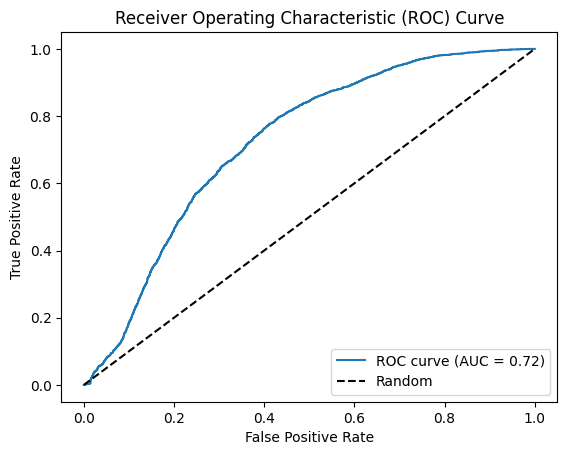

In [19]:

# Calculate the probabilities for class 1 for the ROC curve
y_pred_prob = LR_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


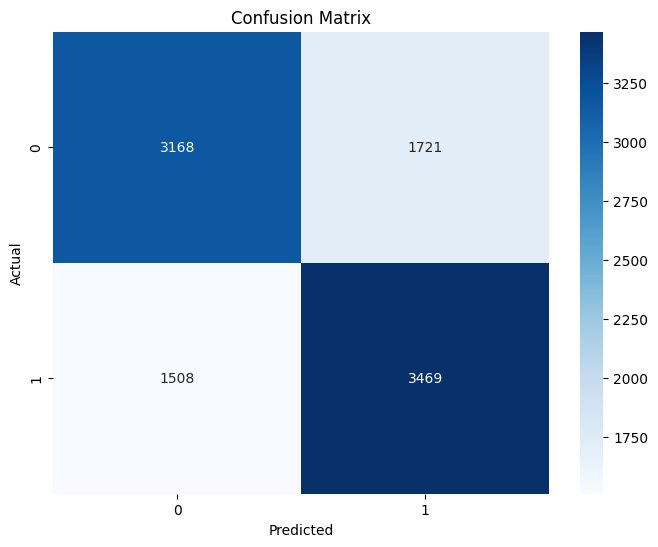

In [16]:

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:

# assuming y_test and y_pred are the true and predicted labels, respectively
# calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# calculate the sensitivity/recall
sensitivity = recall_score(y_test, y_pred)

# calculate the specificity
specificity = tn / (tn + fp)

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

# print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity/Recall:", sensitivity)
print("Specificity:", specificity)
print("AUC Score:",auc_score)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.6727143725927428
Precision: 0.6684007707129095
Sensitivity/Recall: 0.6970062286517983
Specificity: 0.6479852730619758
AUC Score: 0.6724957508568871
Mean Squared Error: 0.32728562740725725


[0.6356983579971619, 0.6410500709507398, 0.6429393229218683, 0.6405475553872348, 0.6430743918276675, 0.6425507140268749, 0.6423344500508024, 0.6406015161134706, 0.6434968627111766]


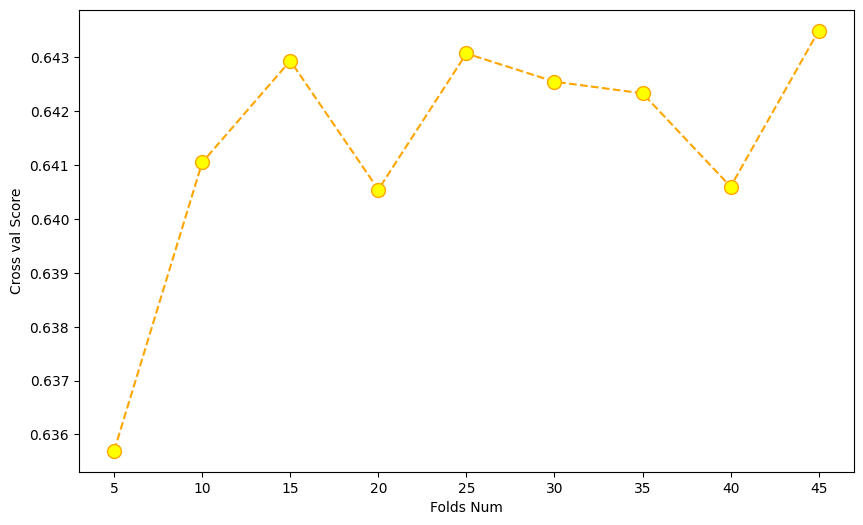

In [22]:
def k_folds_cross_val(folds_num,LR_classifier,X, Y):

    sk_folds = StratifiedKFold(n_splits = folds_num)
    scores = cross_val_score(LR_classifier, X ,Y, cv = sk_folds)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def LeaveOneOut_cross_val(LR_classifier,X, Y):
    
    loo = LeaveOneOut()

    scores = cross_val_score(LR_classifier,X, Y, cv = loo)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def cross_val(LR_classifier,X, Y):
    
    scores=[]
    for folds_num in range (5,20,5):
      K_scores= k_folds_cross_val(folds_num,LR_classifier,X, Y)
      scores.append(K_scores.mean())
    print(scores)
    plt.figure(figsize=(10, 6))
    plt.plot(range (5,50,5), scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
    plt.xlabel('Folds Num')
    plt.ylabel('Cross val Score')

    # LeaveOneOut_scores=LeaveOneOut_cross_val(classifier,X, Y)
    # plt.figure(figsize=(10, 6))
    # plt.plot(range(len(LeaveOneOut_scores)), LeaveOneOut_scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)

cross_val(LR_classifier,x, y )

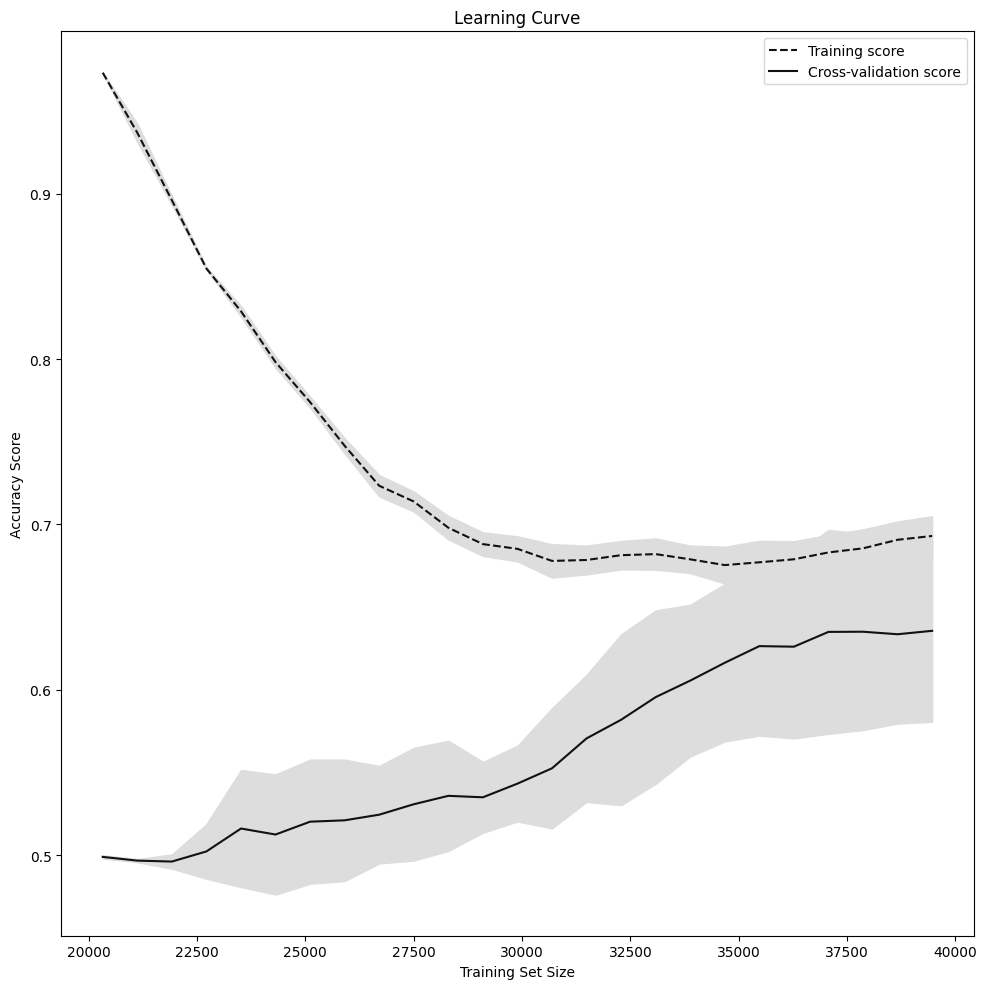

In [23]:
def PlotlearningCurve(classifier,x,y):
    #  Learning Curve and Scores
    train_sizes, train_scores, test_scores = learning_curve(LR_classifier,x,y, cv=5, scoring='accuracy'
                                                                , n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Ploting the Learning Curve
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

PlotlearningCurve(LR_classifier,x, y)